## 1. import

### 1.1 Import libraries

In [16]:
# standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# scikit learn libraries

### 1.2 Import data

In [17]:
# defining the path to the data
path = 'data/'
output_path = 'output/'

In [18]:
# import data
data = pd.read_csv(path + 'user_behavior_dataset.csv')

In [19]:
# showing the 5 random rows of the data
data.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
436,437,OnePlus 9,Android,221,4.4,1341,46,862,20,Male,3
14,15,iPhone 12,iOS,189,5.4,1754,53,779,49,Female,3
295,296,OnePlus 9,Android,65,1.8,481,18,130,41,Male,1
19,20,iPhone 12,iOS,577,8.5,2774,89,2192,29,Female,5
569,570,Google Pixel 5,Android,404,6.6,2181,77,1327,18,Male,4


In [20]:
# normalizing names of the columns
data.columns = data.columns.str.lower().str.replace(' ', '_')

## 2. EDA

### 2.1  Checking the dataset

In [21]:
# searching for null values in the data
data.isnull().sum()

user_id                       0
device_model                  0
operating_system              0
app_usage_time_(min/day)      0
screen_on_time_(hours/day)    0
battery_drain_(mah/day)       0
number_of_apps_installed      0
data_usage_(mb/day)           0
age                           0
gender                        0
user_behavior_class           0
dtype: int64

In [22]:
# checking the data types of the columns
data.dtypes

user_id                         int64
device_model                   object
operating_system               object
app_usage_time_(min/day)        int64
screen_on_time_(hours/day)    float64
battery_drain_(mah/day)         int64
number_of_apps_installed        int64
data_usage_(mb/day)             int64
age                             int64
gender                         object
user_behavior_class             int64
dtype: object

In [ ]:
# checking the devices models
print(data.device_model.unique())

['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']


In [23]:
# defining numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
# defining categorical features
categorical_features = data.select_dtypes(include=[object]).columns.tolist()

In [ ]:
# checking number of distinct values
data.nunique()

user_id                       700
device_model                    5
operating_system                2
app_usage_time_(min/day)      387
screen_on_time_(hours/day)    108
battery_drain_(mah/day)       628
number_of_apps_installed       86
data_usage_(mb/day)           585
age                            42
gender                          2
user_behavior_class             5
dtype: int64

### 2.2 Checking correlations

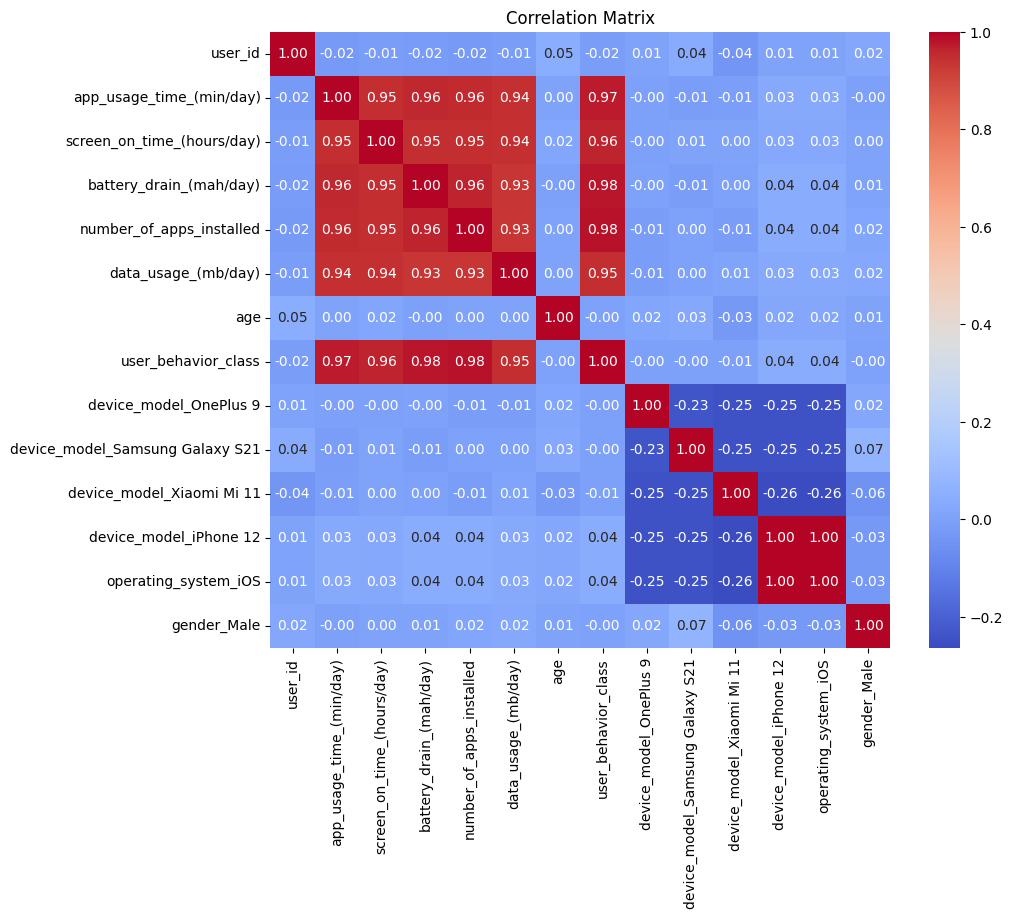

In [ ]:
# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Calculate correlation with age
correlation_with_user_behavior_class = data[numerical_features].corrwith(data['user_behavior_class'])

# Display the correlation with age
print(correlation_with_user_behavior_class)

user_id                      -0.016242
app_usage_time_(min/day)      0.970498
screen_on_time_(hours/day)    0.964581
battery_drain_(mah/day)       0.978587
number_of_apps_installed      0.981255
data_usage_(mb/day)           0.946734
age                          -0.000563
user_behavior_class           1.000000
dtype: float64


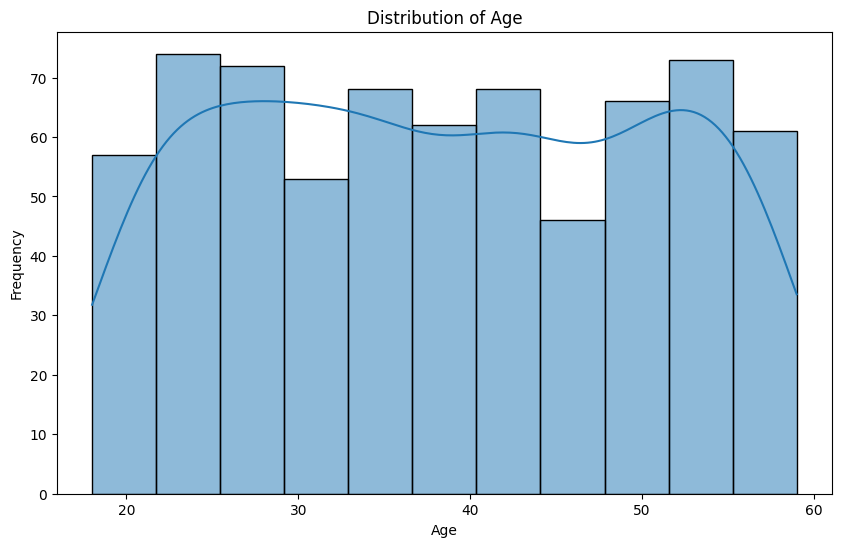

In [ ]:
# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#saving the plot
output_file = os.path.join(output_path, 'age_distribution.png')
plt.savefig(output_file)

#showing the result
plt.show()


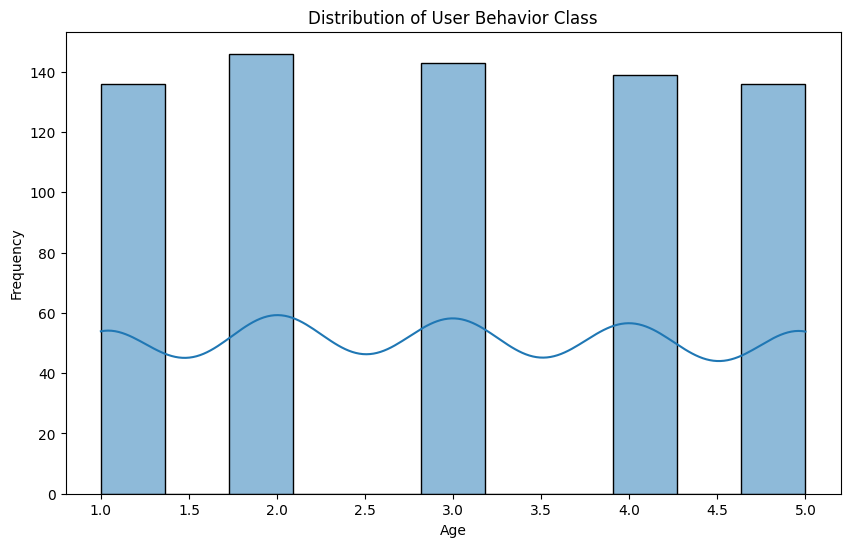

In [37]:
# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['user_behavior_class'], kde=True)
plt.title('Distribution of User Behavior Class')
plt.xlabel('Age')
plt.ylabel('Frequency')

#saving the plot
output_file = os.path.join(output_path, 'user_behavior_distribution.png')
plt.savefig(output_file)

#showing the result
plt.show()

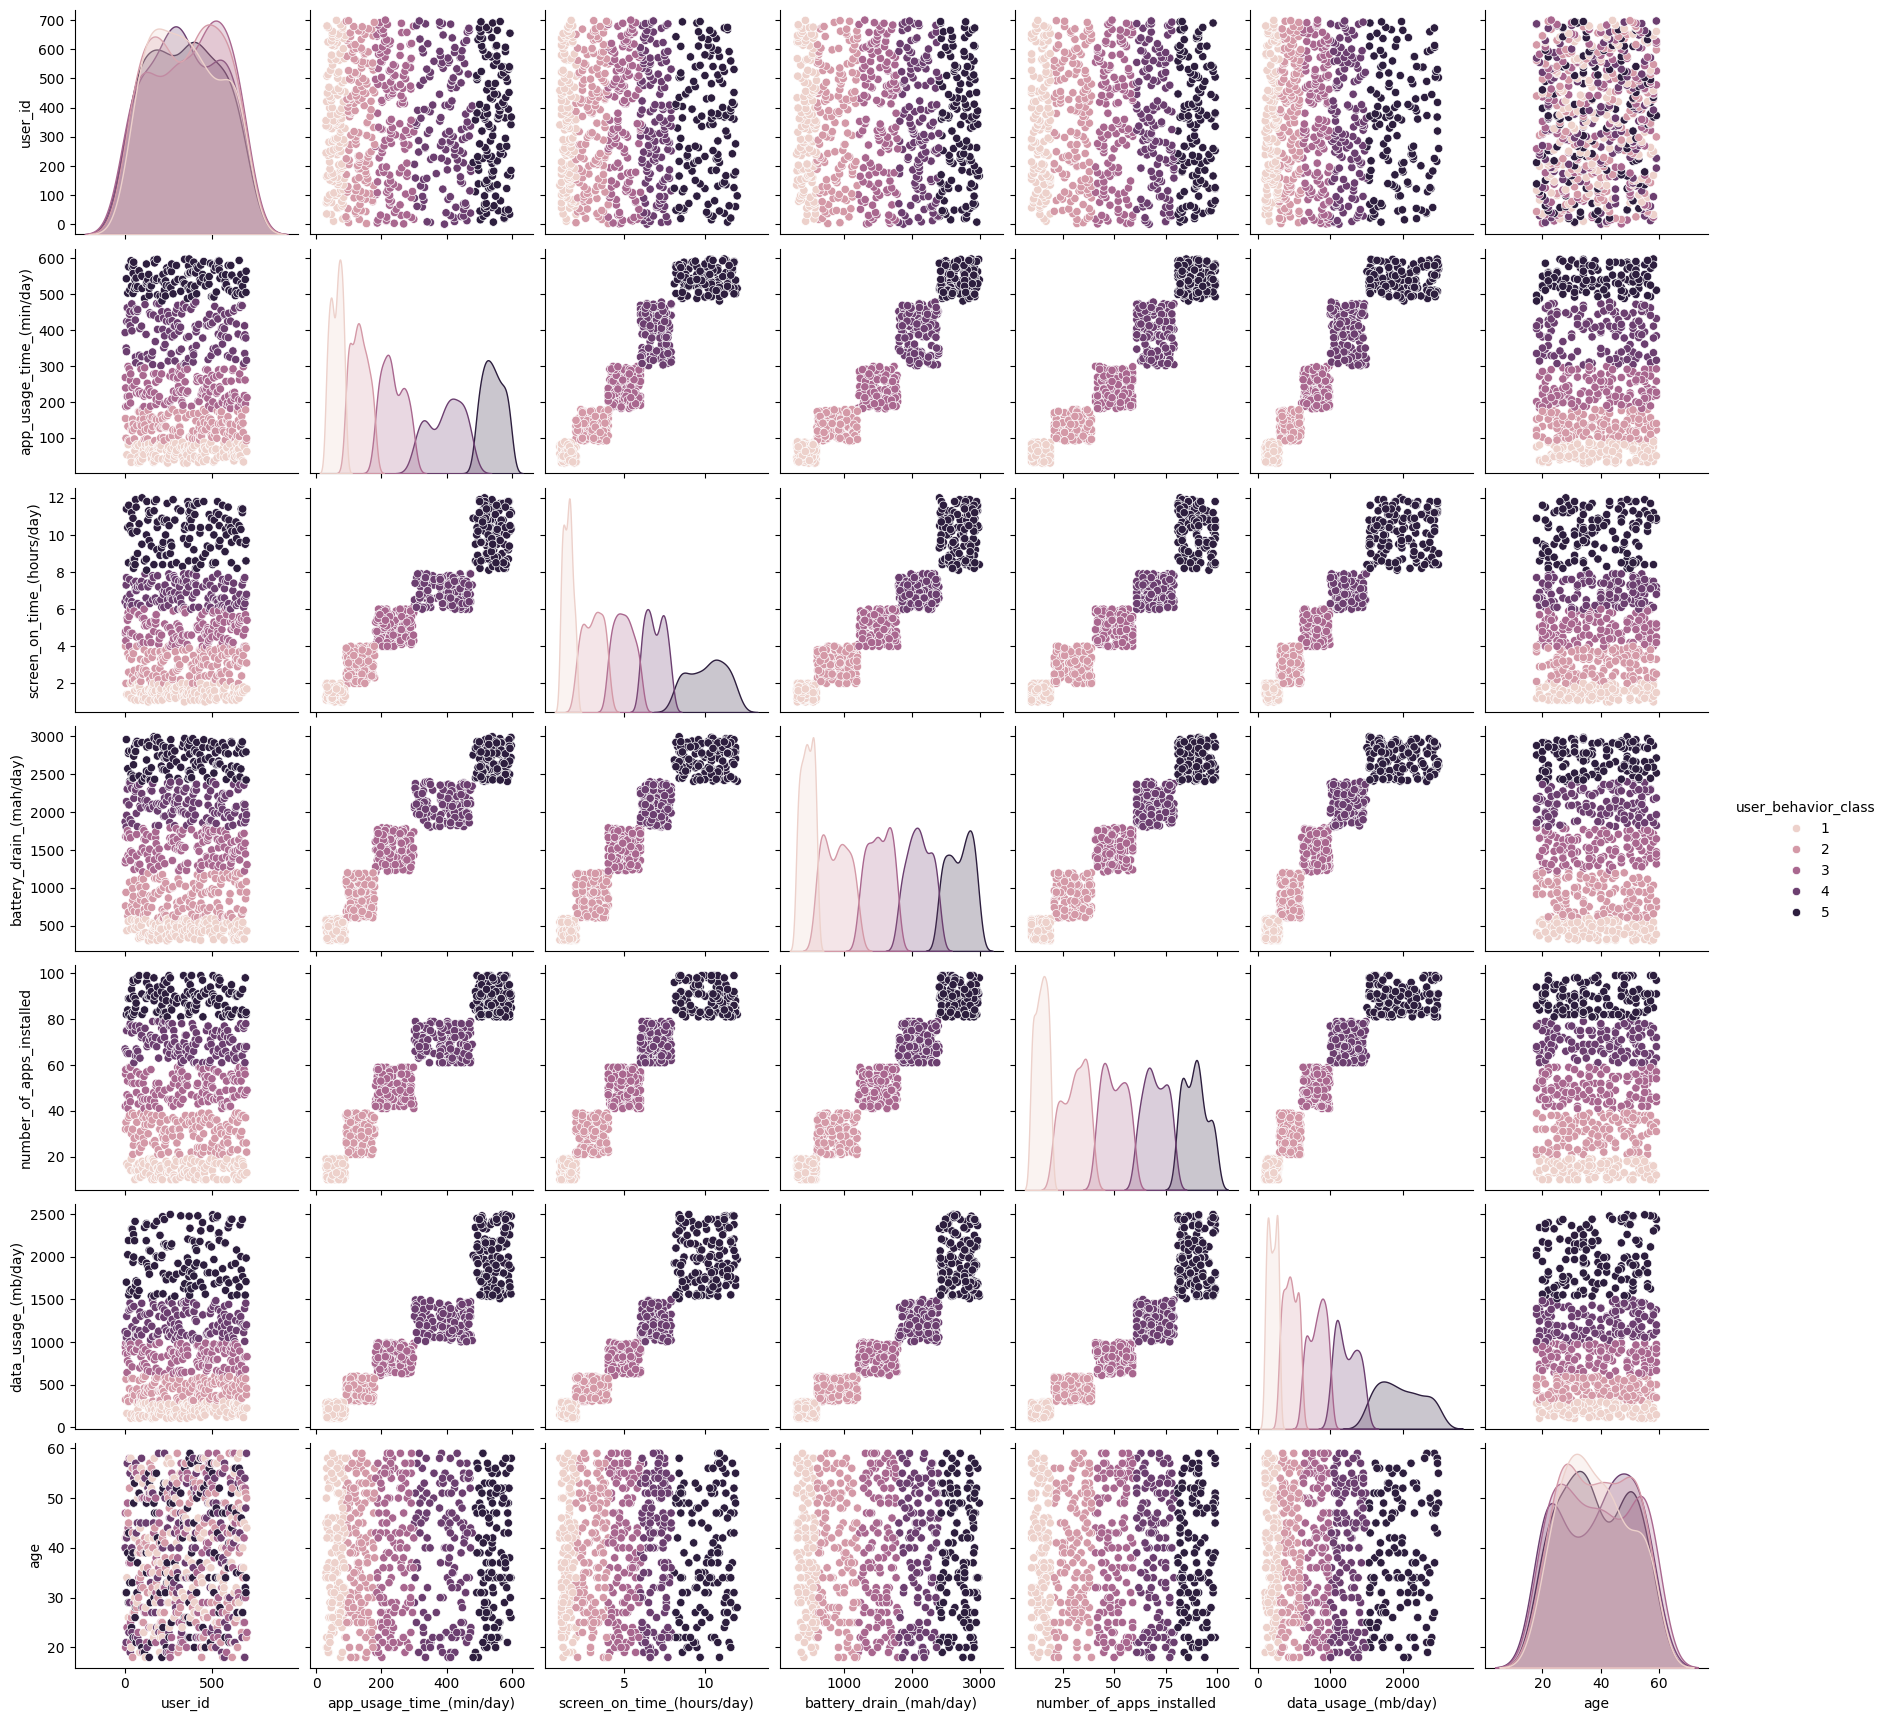

In [35]:
# looking at the relationship with the target variable
sns.pairplot(data, hue='user_behavior_class', diag_kind='kde')
#saving the plot
output_file = os.path.join(output_path, 'pairplot_user_distriution.png')
plt.savefig(output_file)

plt.show()